In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'BankChurners.csv'
data = pd.read_csv(file_path)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


This is the data as it exists before we perform any data cleaning:



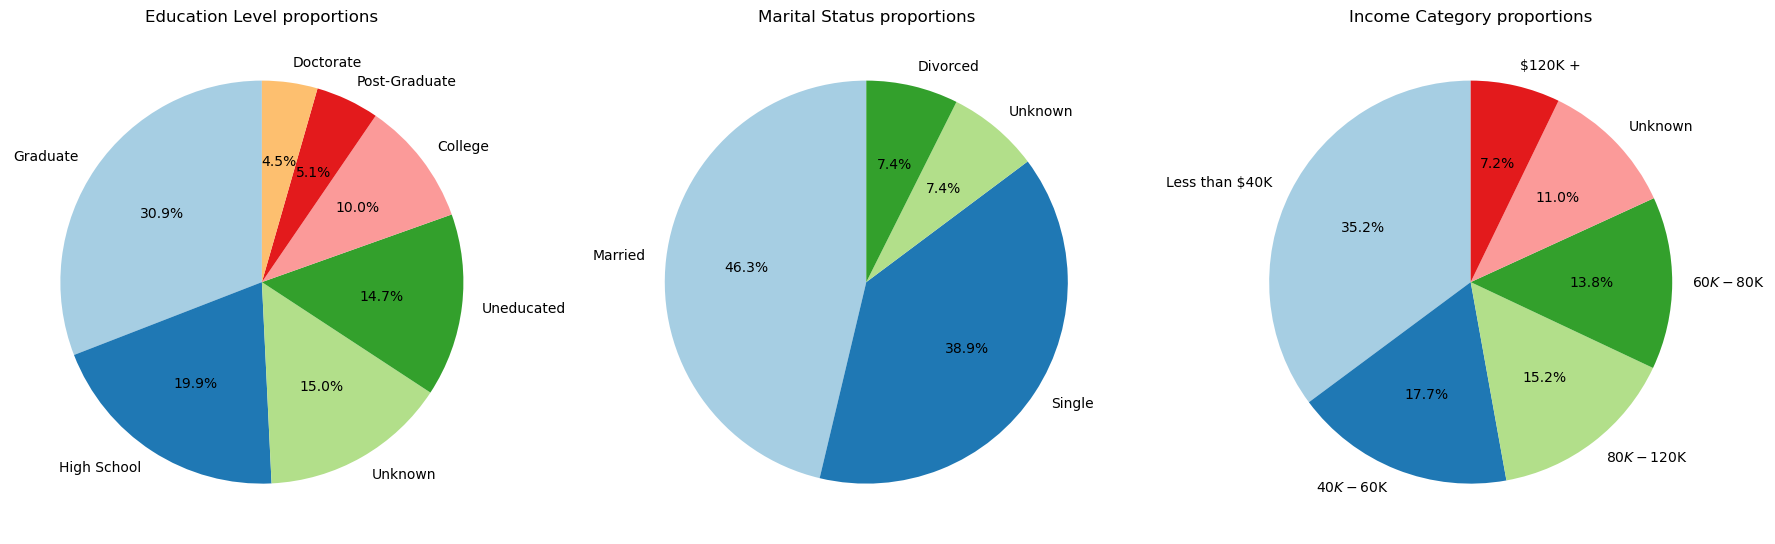

In [3]:


# Pie chart için hazırlık
columns = ["Education_Level", "Marital_Status", "Income_Category"]
titles = ["Education Level proportions", "Marital Status proportions", "Income Category proportions"]

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(columns):
    data[col].value_counts(normalize=True).plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


Data Cleaning.
In this process, we tackled the issue of “Unknown” values in the dataset to prepare it for accurate analysis. We used a Label Encoder to convert categorical text into numbers, then employed an Iterative Imputer with a RandomForestClassifier as its core to predict and fill in these “Unknown” values based on patterns found in other data. This machine learning approach allowed us to infer the missing values smartly and preserve the dataset’s integrity for more reliable results. Once the imputation was complete, we converted the numbers to their original categories, effectively replacing “Unknown” values with meaningful data.



In [4]:



df = pd.read_csv(file_path)  

# Identify columns with 'Unknown' values
col_unknown = [col for col in df.columns if (df[col] == 'Unknown').sum() > 0]

# Initialize encoders and create a copy of the dataset
encoders = {}
df_copy = df.copy()

# Replace 'Unknown' with NaN for imputation
df_copy.replace('Unknown', np.nan, inplace=True)

# Convert categorical text data to numeric using LabelEncoder
for cat in col_unknown:
    encoders[cat] = LabelEncoder()
    known_values = df_copy[cat].dropna()  # Exclude NaN values
    df_copy.loc[known_values.index, cat] = encoders[cat].fit_transform(known_values)

# Use IterativeImputer with RandomForestClassifier to impute NaN values
imp_cat = IterativeImputer(
    estimator=RandomForestClassifier(),
    initial_strategy='most_frequent',
    max_iter=10,
    random_state=0
)

# Perform imputation on the selected columns
df_copy[col_unknown] = imp_cat.fit_transform(df_copy[col_unknown])

# Convert numeric values back to their original categories
for col in col_unknown:
    df[col] = encoders[col].inverse_transform(df_copy[col].astype(int))

# The dataset 'df' now has meaningful values instead of 'Unknown'

# Optional: Save the updated dataset to a file
df.to_csv('updated_dataset.csv', index=False)


After completing data cleaning, here is the updated data.

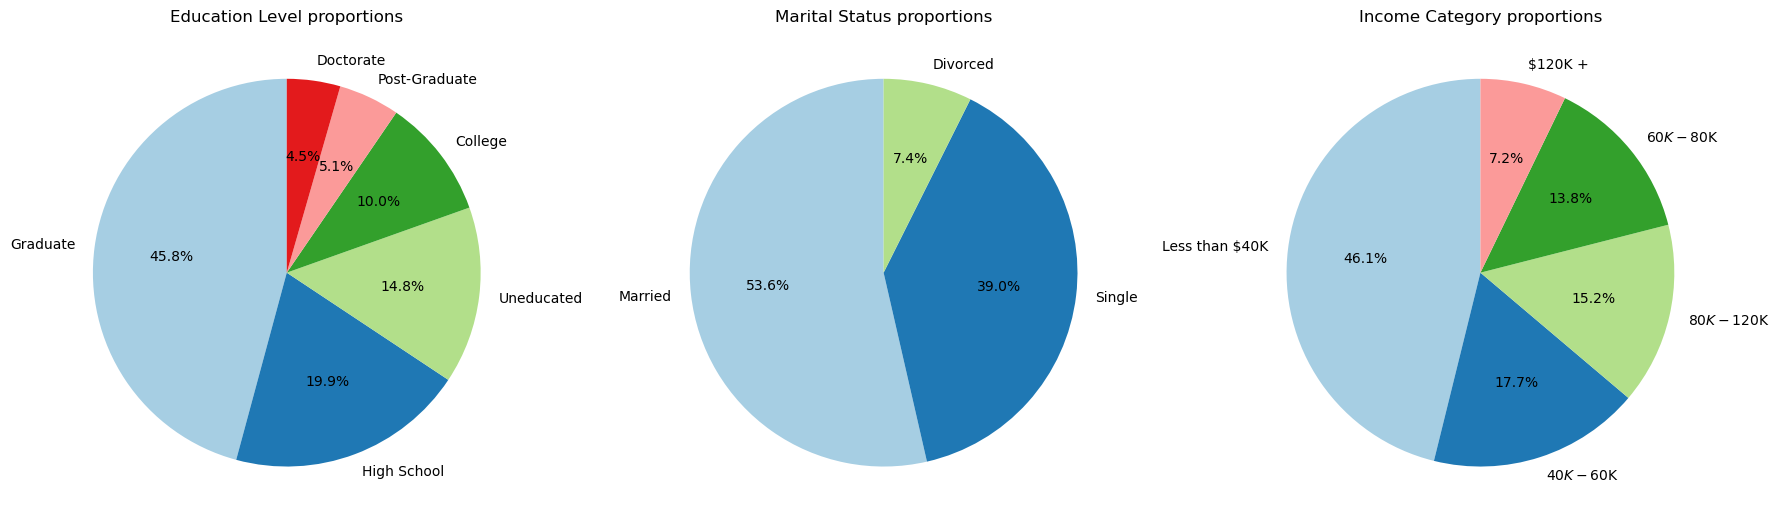

In [5]:
file_path = 'updated_dataset.csv'
data = pd.read_csv(file_path)
data
columns = ["Education_Level", "Marital_Status", "Income_Category"]
titles = ["Education Level proportions", "Marital Status proportions", "Income Category proportions"]

# Görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(columns):
    data[col].value_counts(normalize=True).plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


In this section, I will present a visual analysis of the demographic segmentation of the bank’s customer base, broken down into categories that are critical to understanding customer behavior and potential churn risk.

The section is divided into several parts, each representing a different demographic variable: number of customers, number of churned customers, churn rate, average customer’s age, marital status, gender, income category, education level, and customer’s age distribution. These charts offer a quick and intuitive way to understand the composition of the bank’s customers.

Overview.

In [6]:


# Calculate required statistics
num_customers = len(data)
num_churned = len(data[data['Attrition_Flag'] == 'Attrited Customer'])
churn_rate = (num_churned / num_customers) * 100
avg_age = data['Customer_Age'].mean()

# Print the results
print(f"# of Customers: {num_customers} | # of Churned Customers: {num_churned} | Churn Rate: {churn_rate:.2f}% | Avg. Age: {avg_age:.2f}")

# of Customers: 10127 | # of Churned Customers: 1627 | Churn Rate: 16.07% | Avg. Age: 46.33


of Churned Customers: This is the number of customers who have left the bank, totaling 1,627.

Churn Rate: The churn rate is the percentage of customers who have left, currently at 16.07%. This is a critical metric for the bank, reflecting customer retention success.

#Demographic Breakdown.

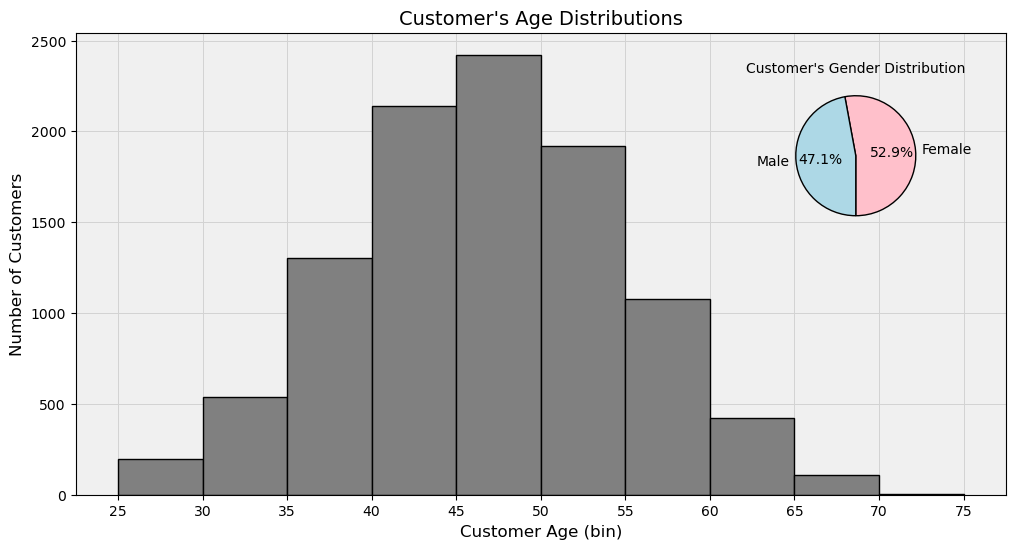

In [7]:
# Adjusting the figure with increased width and adding tick labels for all bin edges
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('#f0f0f0')

# Plotting the histogram for Customer Age Distribution with custom bins
bins = range(25, 80, 5)  # Bins from 25 to 75 with a step of 5
ax.hist(data['Customer_Age'], bins=bins, color='gray', edgecolor='black')
ax.set_title("Customer's Age Distributions", fontsize=14)
ax.set_xlabel("Customer Age (bin)", fontsize=12)
ax.set_ylabel("Number of Customers", fontsize=12)
ax.set_xticks(bins)  # Adding tick marks for each bin edge
ax.set_xticklabels(bins, fontsize=10)  # Labeling the tick marks
ax.grid(color='lightgrey', linestyle='-', linewidth=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind the histogram

# Adding the pie chart to the top-right corner
inset_ax = fig.add_axes([0.65, 0.55, 0.25, 0.25]) # [left, bottom, width, height]
gender_counts = df['Gender'].value_counts()
gender_labels = ['Female' if g == 'F' else 'Male' for g in gender_counts.index]
inset_ax.pie(
    gender_counts, 
    labels=gender_labels , 
    autopct='%1.1f%%', 
    colors = ['pink' if label == 'Female' else 'lightblue' for label in gender_labels], 
    startangle=-90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
inset_ax.set_title("Customer's Gender Distribution", fontsize=10)

# Show the plot
plt.show()


The bank’s customer age profile is concentrated in the mid-life brackets, with the 45–50 age group being the largest at 2,422 customers, closely followed by those aged 40–45 and 50–55, with 2,139 and 1,920 customers, respectively. Substantial numbers are also seen in the 35–40 range, while the 55–60 and 60–65 groups show moderate figures. Younger adults between 25 and 35 are less represented, and the senior segments beyond 65 drop sharply, with the 70 to 75 age group being the smallest.

Gender: Here, the customer base leans slightly towards females, who constitute 52.91% of the customers, with males making up the remaining 47.09%.

Churn Analysis.

In the churn analysis section, we delve into the multifaceted aspects of customer attrition. We seek to uncover patterns and correlations that could explain why specific customers discontinue their relationship with the bank. This section is segmented into three distinct analyses, each examining churn through the lens of different customer characteristics and behaviors. By exploring these dimensions, we aim to identify actionable insights that can inform strategies to improve customer retention.

I. Churn Analysis by Customer’s Status.

This subsection analyzes churn with customers’ demographics and socio-economic statuses. Through visualizations of churn by age, marital status and dependent counts, education level, and income, we aim to understand how these personal attributes correlate with the likelihood of customers leaving the bank. These insights can highlight specific segments that may require targeted retention efforts.

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\1612737164.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = data.groupby('Age_Bin').agg(


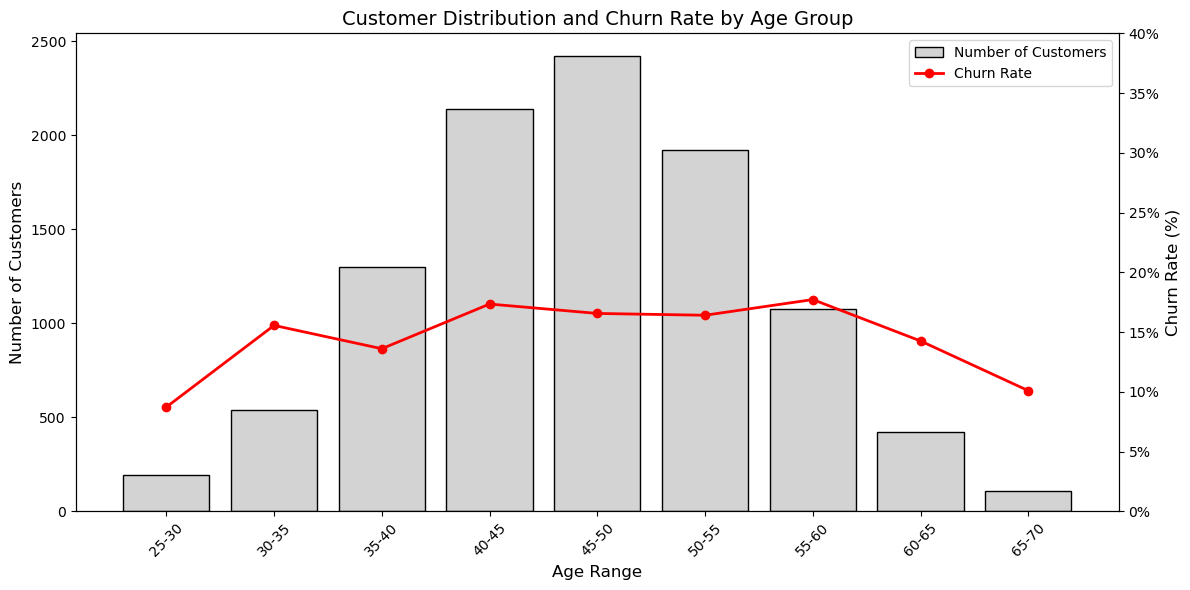

In [8]:
data['Churn_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Create age bins in 5-year intervals from 25 to 70
bins = list(range(25, 71, 5))  # 25 to 70 in steps of 5
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Bin the ages
data['Age_Bin'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, right=False)

# Calculate statistics for each age group
age_group_stats = data.groupby('Age_Bin').agg(
    Customer_Count=('CLIENTNUM', 'count'),
    Churn_Rate=('Churn_Flag', 'mean')
).reset_index()

# Convert churn rate to percentage
age_group_stats['Churn_Rate'] *= 100

# Create lists for plotting
bin_labels_full_range = age_group_stats['Age_Bin'].tolist()
customer_count_full_range = age_group_stats['Customer_Count'].tolist()
churn_rate_full_range = age_group_stats['Churn_Rate'].tolist()

# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of customers
bars = ax1.bar(
    bin_labels_full_range, 
    customer_count_full_range,
    color='lightgray', 
    edgecolor='black', 
    width=0.8, 
    label='Number of Customers'
)

# Customize primary y-axis (customer count)
ax1.set_xlabel("Age Range", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Customer Distribution and Churn Rate by Age Group", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create secondary y-axis for churn rate
ax2 = ax1.twinx()
line = ax2.plot(bin_labels_full_range, churn_rate_full_range, 
                color='red', marker='o', linewidth=2, 
                label='Churn Rate')

# Customize secondary y-axis (churn rate)
ax2.set_ylabel("Churn Rate (%)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_yticks(range(0, 45, 5))
ax2.set_yticklabels([f"{x}%" for x in range(0, 45, 5)])

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The data indicates that the highest churn rates are found in the 55–60 and 40–45 age brackets, with rates exceeding 17%, suggesting these middle-aged groups are the most likely to leave the bank. Lower churn rates in the younger (25–30) and older (65–70) age groups imply better retention, with the youngest cohort showing notably higher loyalty at just 8.72% churn.

I. II. Churn by Income.

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\2683335720.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f"{int(x/1000)}k" for x in ax1.get_yticks()])


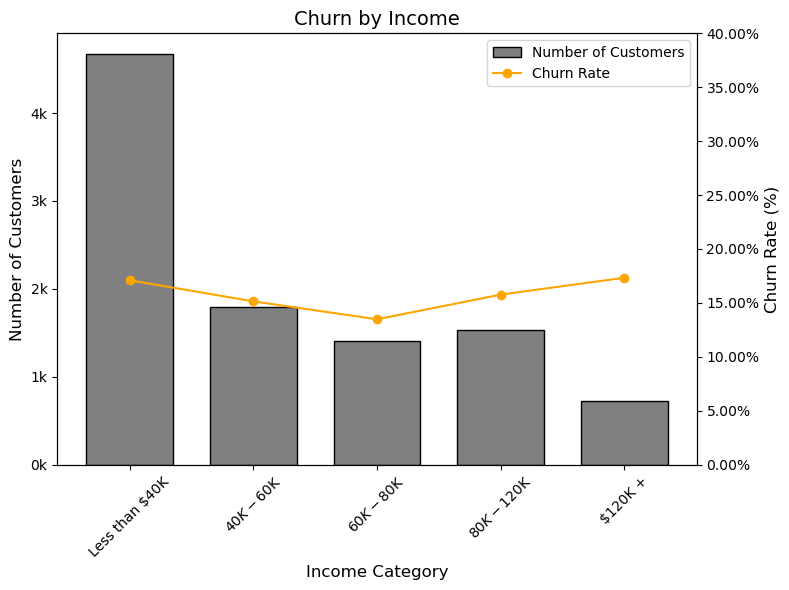

In [9]:
# Recompute churn rate and customer count for each income category
income_group_stats = data.groupby('Income_Category').agg(
    Customer_Count=('CLIENTNUM', 'count'),
    Churn_Rate=('Churn_Flag', 'mean')
).reset_index()

# Convert churn rate to percentages
income_group_stats['Churn_Rate'] *= 100

# Reorder income categories for correct visualization
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"]
income_group_stats['Income_Category'] = pd.Categorical(
    income_group_stats['Income_Category'], categories=income_order, ordered=True
)
income_group_stats = income_group_stats.sort_values('Income_Category')

# Extract reordered values for plotting
income_labels_ordered = income_group_stats['Income_Category']
customer_count_ordered = income_group_stats['Customer_Count']
churn_rate_ordered = income_group_stats['Churn_Rate']

# Plot the graph with updated order and formatted customer count labels
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for number of customers
ax1.bar(
    income_labels_ordered, customer_count_ordered, 
    color='gray', edgecolor='black', width=0.7, label='Number of Customers', align='center'
)
ax1.set_xlabel("Income Category", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Churn by Income", fontsize=14)
ax1.set_xticks(range(len(income_labels_ordered)))
ax1.set_xticklabels(income_labels_ordered, rotation=45)
ax1.set_yticklabels([f"{int(x/1000)}k" for x in ax1.get_yticks()])  

# Line plot for churn rate on the secondary axis
ax2 = ax1.twinx()
ax2.plot(range(len(income_labels_ordered)), churn_rate_ordered, color='orange', marker='o', label='Churn Rate')
ax2.set_ylabel("Churn Rate (%)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_yticks(range(0, 45, 5))  # Churn rate ticks from 0 to 40 with a step of 5
ax2.set_yticklabels([f"{x:.2f}%" for x in range(0, 45, 5)])

# Adding legends
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.tight_layout()
plt.show()


The churn by income data indicates that customers with less than $40K and those earning $120K or more are the most likely to churn, with rates of approximately 17.10% and 17.33%, respectively. The lowest churn rate is observed within the $60K — $80K income bracket at around 13.41%. Those in the middle-income ranges of $40K — $60K and $80K — $120K have churn rates of approximately 15.14% and 15.77%, respectively.

According to the findings, customers with the lowest and highest income are likelier to churn. This may be due to several factors, such as the unavailability of financial products that cater to their specific requirements or dissatisfaction with the services provided.

I. III. Churn by Education Level

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\904292553.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f"{int(x/1000)}k" for x in ax1.get_yticks()])  # 1k formatı


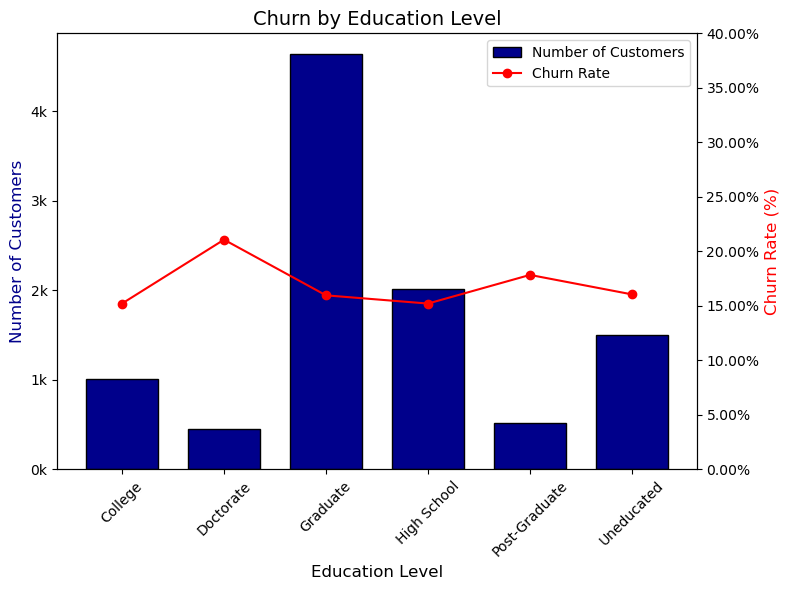

In [10]:
# Yeniden education_group_stats oluşturuluyor
education_group_stats = data.groupby('Education_Level').agg(
    Customer_Count=('CLIENTNUM', 'count'),
    Churn_Rate=('Churn_Flag', 'mean')
).reset_index()

# Churn oranını yüzdeye çevir
education_group_stats['Churn_Rate'] *= 100

# Eğitim düzeylerini yeniden sıralama
education_order_updated = [
    "College", "Doctorate", "Graduate", "High School", "Post-Graduate", "Uneducated"
]
education_group_stats['Education_Level'] = pd.Categorical(
    education_group_stats['Education_Level'], categories=education_order_updated, ordered=True
)
education_group_stats = education_group_stats.sort_values('Education_Level')

# Grafiği çizmek için güncellenen değerler
education_labels_updated = education_group_stats['Education_Level']
customer_count_updated = education_group_stats['Customer_Count']
churn_rate_updated = education_group_stats['Churn_Rate']

# Grafiği yeniden oluştur
fig, ax1 = plt.subplots(figsize=(8, 6))

# Müşteri sayıları için bar grafiği
ax1.bar(
    education_labels_updated, customer_count_updated, 
    color='darkblue', edgecolor='black', width=0.7, label='Number of Customers', align='center'
)
ax1.set_xlabel("Education Level", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12, color='darkblue')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title("Churn by Education Level", fontsize=14)
ax1.set_xticks(range(len(education_labels_updated)))
ax1.set_xticklabels(education_labels_updated, rotation=45)
ax1.set_yticklabels([f"{int(x/1000)}k" for x in ax1.get_yticks()])  # 1k formatı

# Churn oranı için çizgi grafiği
ax2 = ax1.twinx()
ax2.plot(range(len(education_labels_updated)), churn_rate_updated, color='red', marker='o', label='Churn Rate')
ax2.set_ylabel("Churn Rate (%)", fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_yticks(range(0, 45, 5))  # Churn oranı ekseni
ax2.set_yticklabels([f"{x:.2f}%" for x in range(0, 45, 5)])

# Efsane ekleniyor
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Grafiği göster
plt.tight_layout()
plt.show()


The churn by education level data reveals a correlation between education and customer churn rates. Customers holding a Doctorate exhibit the highest churn rate at approximately 21.06%. Post-graduates also show a relatively high churn rate of around 17.83%. In contrast, those with College or High School education levels have lower churn rates at approximately 15.02% and 15.20%, respectively. Uneducated customers and Graduates fall in the mid-range with churn rates of roughly 16.04% and 15.96%, respectively.

Higher educational levels, particularly doctorate and post-graduate, correlate with higher churn rates. This could indicate that these customers have higher expectations or more opportunities to switch to competitive offerings.

I. IV. Churn by Marital Status and Dependent.

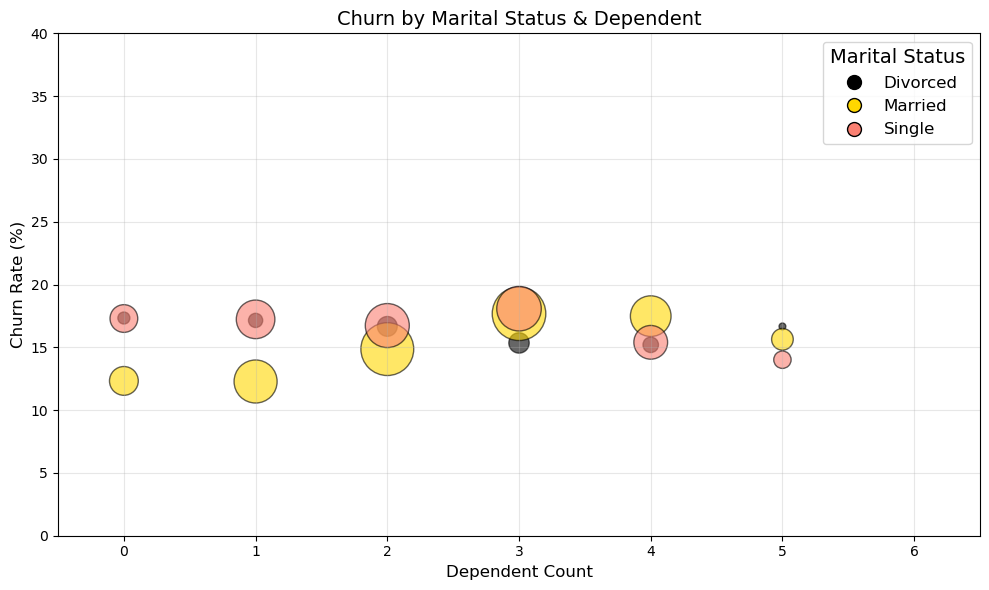

In [11]:
# Legend boyutunu artırma ve legend içindeki örnek balonları eşit boyutlu yapma
fig, ax = plt.subplots(figsize=(10, 6))

# Evlilik durumu için renkleri belirleme
colors = {'Divorced': 'black', 'Married': 'gold', 'Single': 'salmon'}

# Dependent count ve marital status gruplama ile ilgili gerekli hesaplamalar
dependent_marital_stats = data.groupby(['Dependent_count', 'Marital_Status']).agg(
    Customer_Count=('CLIENTNUM', 'count'),
    Churn_Rate=('Churn_Flag', 'mean')
).reset_index()



# Her evlilik durumu için balonlar ekleme (daire şeklinde)
for status in dependent_marital_stats['Marital_Status'].unique():
    subset = dependent_marital_stats[dependent_marital_stats['Marital_Status'] == status]
    ax.scatter(
        subset['Dependent_count'], 
        subset['Churn_Rate'] * 100,  # Yüzdeye çevriliyor
        s=subset['Customer_Count'],  # Balon büyüklüğü
        alpha=0.6, 
        label=status, 
        color=colors[status], 
        edgecolor='black', 
        marker='o'  # Balonları daire şekline ayarlama
    )

# Grafik ayarları
ax.set_xlabel("Dependent Count", fontsize=12)
ax.set_ylabel("Churn Rate (%)", fontsize=12)
ax.set_title("Churn by Marital Status & Dependent", fontsize=14)
ax.set_xlim(-0.5, 6.5)
ax.set_ylim(0, 40)
ax.grid(alpha=0.3)

# Legend düzenlemesi: Balonları eşit boyutta ve büyük font
handles, labels = ax.get_legend_handles_labels()
legend_bubbles = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color, markeredgecolor='black') 
    for label, color in zip(labels, colors.values())
]
ax.legend(handles=legend_bubbles, title="Marital Status", fontsize=12, title_fontsize=14, loc='upper right')

# Grafiği göster
plt.tight_layout()
plt.show()


Divorced customers with no dependents have the highest churn rate at 17.33%, which generally decreases as the number of dependents increases.

Married customers show a varying churn rate, starting at 12.33% for those with no dependents, increasing with one or more dependents, and peaking at 17.67% for those with three dependents. Interestingly, married customers with four dependents also have a high churn rate of approximately 17.48%.

Single customers have churn rates that increase with the number of dependents, with the highest churn rate of 18.08% observed in singles with three dependents. The rate then declines slightly for those with four dependents and more significantly for those with five.

II. Churn Analysis by Customer’s Account.

Here, we focus on how various account-related factors might influence churn. We examine the duration of the customer relationship (months on book), credit limits, card categories, and the number of products used to determine their impact on customer loyalty. Visualizations will illustrate whether specific account characteristics are more commonly associated with higher churn rates.

II. I. Churn by Months of Book.

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\3701644701.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  months_on_book_stats = data.groupby('Months_on_Book_Bin').agg(


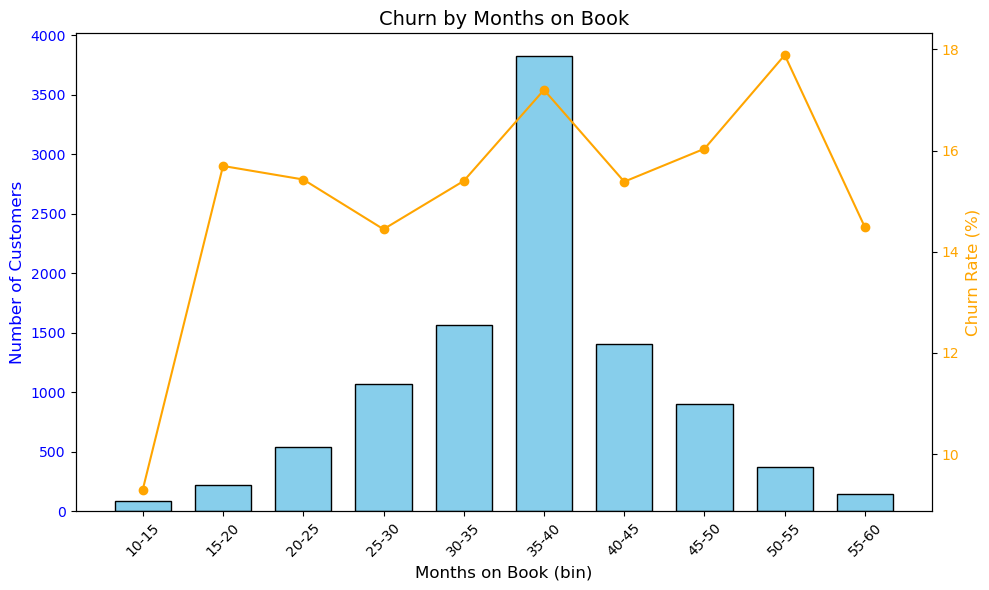

In [12]:
# Define bins and labels for Months_on_book
bins = list(range(10, 61, 5))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Assign each customer to a bin based on Months_on_book
data['Months_on_Book_Bin'] = pd.cut(data['Months_on_book'], bins=bins, labels=labels, right=False)

# Calculate churn rate and customer count for each bin
months_on_book_stats = data.groupby('Months_on_Book_Bin').agg(
    Customer_Count=('CLIENTNUM', 'count'),
    Churn_Rate=('Churn_Flag', 'mean')
).reset_index()

# Convert churn rate to percentages
months_on_book_stats['Churn_Rate'] *= 100

# Extracting values for plotting
bin_labels = months_on_book_stats['Months_on_Book_Bin']
customer_count = months_on_book_stats['Customer_Count']
churn_rate = months_on_book_stats['Churn_Rate']

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of customers
ax1.bar(
    bin_labels, customer_count, 
    color='skyblue', edgecolor='black', 
    label='Number of Customers', width=0.7
)
ax1.set_xlabel("Months on Book (bin)", fontsize=12)
ax1.set_ylabel("Number of Customers", fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Churn by Months on Book", fontsize=14)
ax1.set_xticks(bin_labels)
ax1.set_xticklabels(bin_labels, rotation=45)

# Line plot for churn rate
ax2 = ax1.twinx()
ax2.plot(bin_labels, churn_rate, color='orange', marker='o', label='Churn Rate')
ax2.set_ylabel("Churn Rate (%)", fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')



# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


The churn by months on book data provides insights into customer loyalty relative to when they have been with the bank. Notably, customers within the 48–51 months on book range show the highest churn rate at roughly 19.05%, indicating a potential issue with long-term customer retention. Conversely, the lowest churn rate is observed in the 12–15 months range at about 9.30%, suggesting newer customers are less likely to churn.

II. II. Churn by Credit Limit.

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\4137360424.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Credit_Limit_Binned').agg(


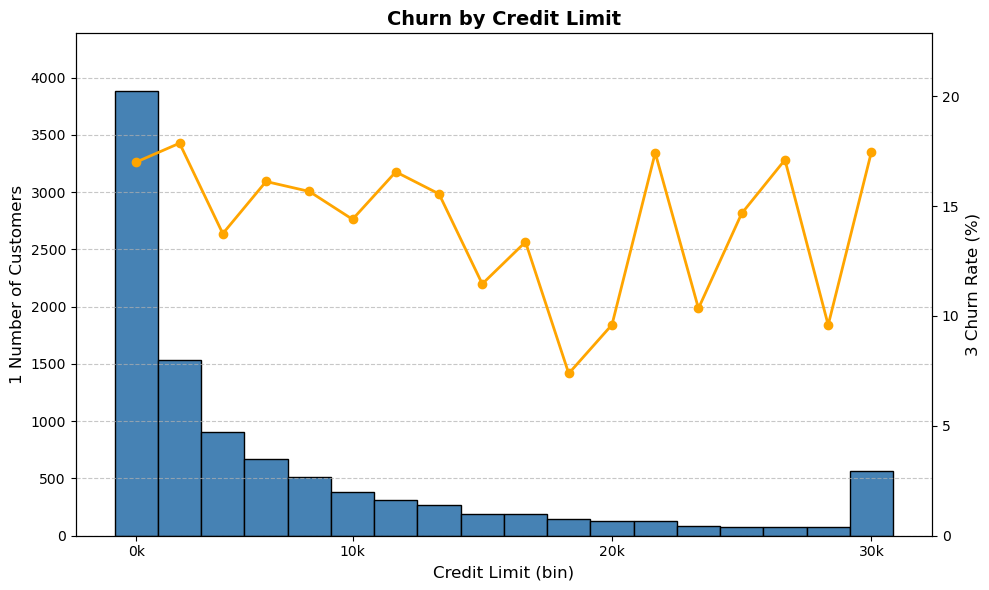

In [13]:



# Credit Limit'i 18 bar aralığına böl
bins = np.linspace(data['Credit_Limit'].min(), data['Credit_Limit'].max(), 19)
bin_labels = [f'Bin {i}' for i in range(len(bins) - 1)]
data['Credit_Limit_Binned'] = pd.cut(data['Credit_Limit'], bins, labels=bin_labels, include_lowest=True)

# Her bin için ortalama churn oranını ve müşteri sayısını hesapla
binned_data = data.groupby('Credit_Limit_Binned').agg(
    Churn_Rate=('Attrition_Flag', lambda x: (x == 'Attrited Customer').mean()),
    Number_of_Customers=('Credit_Limit', 'count')
).reset_index()

# X ekseni etiketlerini ayarlama
num_ticks = 4  # İstenilen etiket sayısı (0k, 10k, 20k, 30k)
tick_positions = np.linspace(0, len(bin_labels) - 1, num_ticks).astype(int)
tick_labels = ['0k', '10k', '20k', '30k']

# Grafiği oluştur
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar grafiği: Müşteri sayısı
bars = ax1.bar(
    binned_data.index,  # X ekseni olarak bin indexlerini kullan
    binned_data['Number_of_Customers'], 
    width=1, 
    edgecolor="black", 
    label="1 Number of Customers",
    color='steelblue'
)

# Birincil Y eksenini ayarla
ax1.set_xlabel('Credit Limit (bin)', fontsize=12)
ax1.set_ylabel('1 Number of Customers', fontsize=12)
ax1.set_ylim(0, binned_data['Number_of_Customers'].max() + 500)
ax1.set_xticks(tick_positions)  # Belirli konumlardaki etiketleri göster
ax1.set_xticklabels(tick_labels, fontsize=10)

# İkincil Y ekseni: Churn oranı
ax2 = ax1.twinx()
ax2.plot(
    binned_data.index, 
    binned_data['Churn_Rate'] * 100,  # Yüzdeye çevir
    color="orange", 
    marker='o', 
    label="3 Churn Rate", 
    linewidth=2
)
ax2.set_ylabel('3 Churn Rate (%)', fontsize=12)
ax2.set_ylim(0, binned_data['Churn_Rate'].max() * 100 + 5)

# Y ekseni için kılavuz çizgileri ekle
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Başlık
plt.title('Churn by Credit Limit', fontsize=14, fontweight='bold')

# Sıkı düzenleme
plt.tight_layout()

# Grafiği göster
plt.show()


The churn by credit limit data suggests that customers with very low credit limits (0–2000) have the highest propensity to churn, with a churn rate of approximately 26.90%. Interestingly, customers with credit limits in the middle ranges, such as 12000–14000 and 28000–30000, also exhibit higher churn rates of about 18.53% and 18.29%, respectively. On the lower end of churn rates are those with credit limits between 20000–22000 and 30000–32000, showing rates around 7.19% and 9.72%, which could indicate higher satisfaction or loyalty within these groups.

II. III.Churn by Card Category.

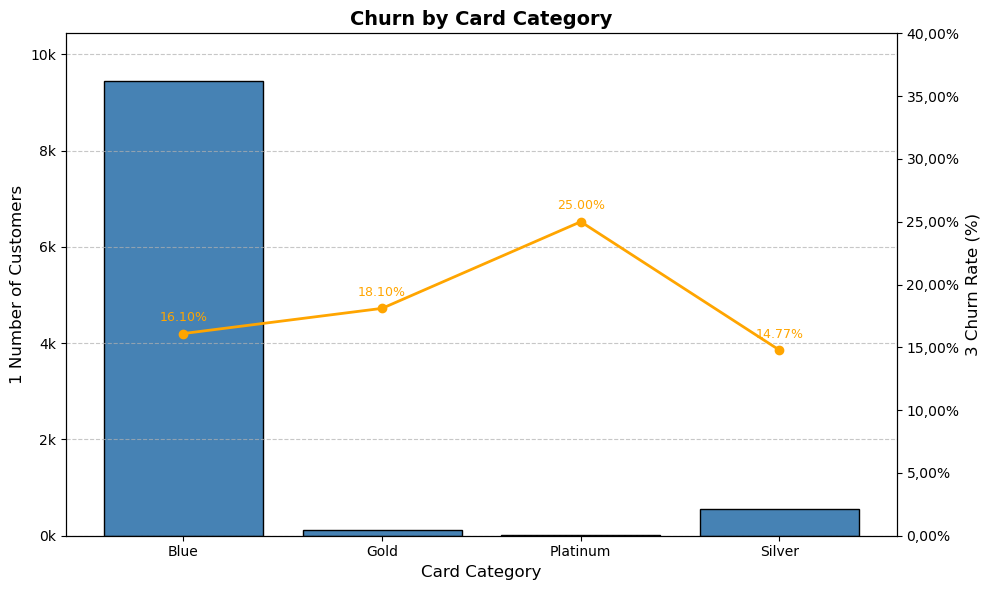

In [14]:
# Filter and preprocess data
card_category_order = ["Blue", "Gold", "Platinum", "Silver"]
data['Attrited'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Aggregate data by Card Category
card_stats = data.groupby('Card_Category').agg(
    Churn_Rate=('Attrited', 'mean'),
    Number_of_Customers=('Customer_Age', 'count')
).reindex(card_category_order).reset_index()

# Plot settings
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for number of customers
bars = ax1.bar(
    card_stats['Card_Category'],
    card_stats['Number_of_Customers'],
    color='steelblue',
    edgecolor='black',
    label="1 Number of Customers"
)

# Format y-axis for number of customers
ax1.set_ylabel("1 Number of Customers", fontsize=12)
ax1.set_yticks(np.arange(0, card_stats['Number_of_Customers'].max() + 2000, 2000))
ax1.set_yticklabels([f"{int(y/1000)}k" for y in ax1.get_yticks()], fontsize=10)
ax1.set_xlabel("Card Category", fontsize=12)
ax1.set_ylim(0, card_stats['Number_of_Customers'].max() + 1000)

# Add secondary axis for churn rate
ax2 = ax1.twinx()
ax2.plot(
    card_stats['Card_Category'],
    card_stats['Churn_Rate'] * 100,
    color='orange',
    marker='o',
    linewidth=2,
    label="3 Churn Rate"
)

# Format y-axis for churn rate
ax2.set_ylabel("3 Churn Rate (%)", fontsize=12)
ax2.set_ylim(0, 40)
ax2.set_yticks(np.arange(0, 41, 5))
ax2.set_yticklabels([f"{int(y)},00%" for y in ax2.get_yticks()], fontsize=10)

# Add churn rate values above the line plot
for i, value in enumerate(card_stats['Churn_Rate'] * 100):
    ax2.text(
        i, value + 1, f"{value:.2f}%", color="orange", fontsize=9, ha="center"
    )

# Title and grid
plt.title("Churn by Card Category", fontsize=14, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


The churn by card category data reflects churn rates among different types of cardholders. Platinum cardholders show the highest churn rate at 25%, significantly higher than other categories. Gold card members have the second-highest churn rate at approximately 18.10%, followed closely by Blue card members at around 16.10%. Silver cardholders exhibit the lowest churn rate at about 14.77%.

II. IV. Churn by Product Used.


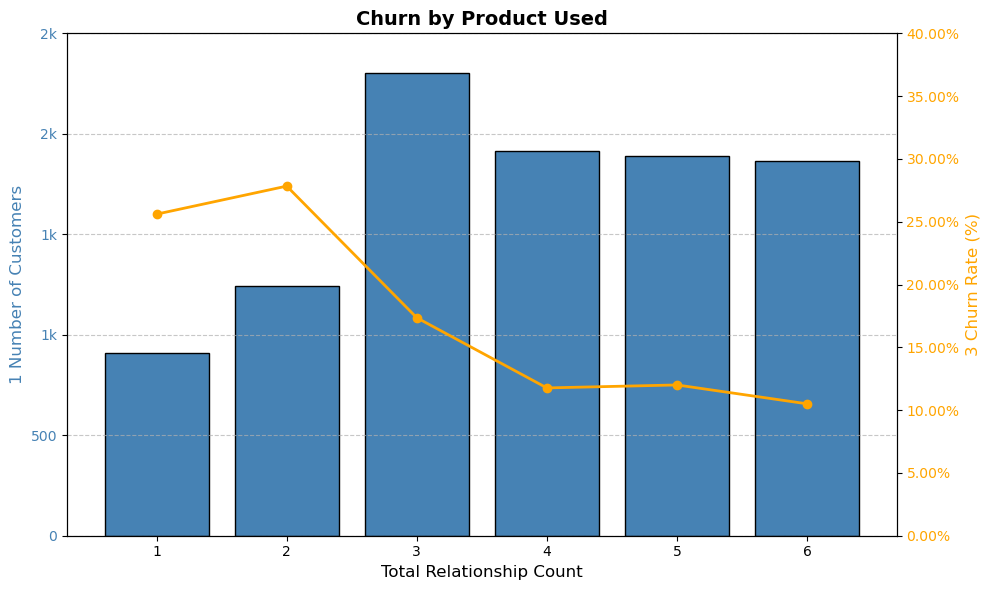

In [15]:
# Data processing for Total_Relationship_Count
relationship_data = data.groupby('Total_Relationship_Count').agg(
    Number_of_Customers=('CLIENTNUM', 'count'),
    Churn_Rate=('Attrition_Flag', lambda x: (x == 'Attrited Customer').mean() * 100)
).reset_index()

# Plot settings
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Number of Customers
bars = ax1.bar(
    relationship_data['Total_Relationship_Count'], 
    relationship_data['Number_of_Customers'], 
    color='steelblue', 
    edgecolor='black', 
    width=0.8, 
    label='1 Number of Customers'
)

# Configure primary y-axis
ax1.set_xlabel('Total Relationship Count', fontsize=12)
ax1.set_ylabel('1 Number of Customers', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_yticks(np.arange(0, relationship_data['Number_of_Customers'].max() + 500, 500))
ax1.set_yticklabels([f'{int(val/1000)}k' if val >= 1000 else f'{val}' for val in np.arange(0, relationship_data['Number_of_Customers'].max() + 500, 500)])

# Line plot for Churn Rate
ax2 = ax1.twinx()
ax2.plot(
    relationship_data['Total_Relationship_Count'], 
    relationship_data['Churn_Rate'], 
    color='orange', 
    marker='o', 
    linewidth=2, 
    label='3 Churn Rate'
)
ax2.set_ylabel('3 Churn Rate (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_yticks(np.arange(0, 45, 5))
ax2.set_yticklabels([f'{val:.2f}%' for val in np.arange(0, 45, 5)])

# Adding gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding title
plt.title('Churn by Product Used', fontsize=14, fontweight='bold')

# Tight layout for spacing
plt.tight_layout()

# Show the plot
plt.show()

The churn by-product used data indicates a trend where customers with fewer product relationships tend to churn more. Customers with only one product have a churn rate of approximately 25.60%, and those with two products have an even higher churn rate of about 27.84%. However, the churn rate declines notably as the total relationship count increases. Customers with three products have a churn rate of around 17.35%, which decreases further for those with four and five products, at approximately 11.77% and 12.00%, respectively. Notably, customers with relationships across all six product types show the lowest churn rate at roughly 10.50%.

III. Churn Analysis by Customer’s Account Activity.

The final subsection explores the role of account activity in customer churn. By investigating patterns related to inactive periods, revolving balance, and transaction counts, we aim to identify behaviors that signal a higher attrition risk. Understanding these activity-based trends can be critical for developing engagement strategies to retain customers.

III. I. Churn by Inactive Period

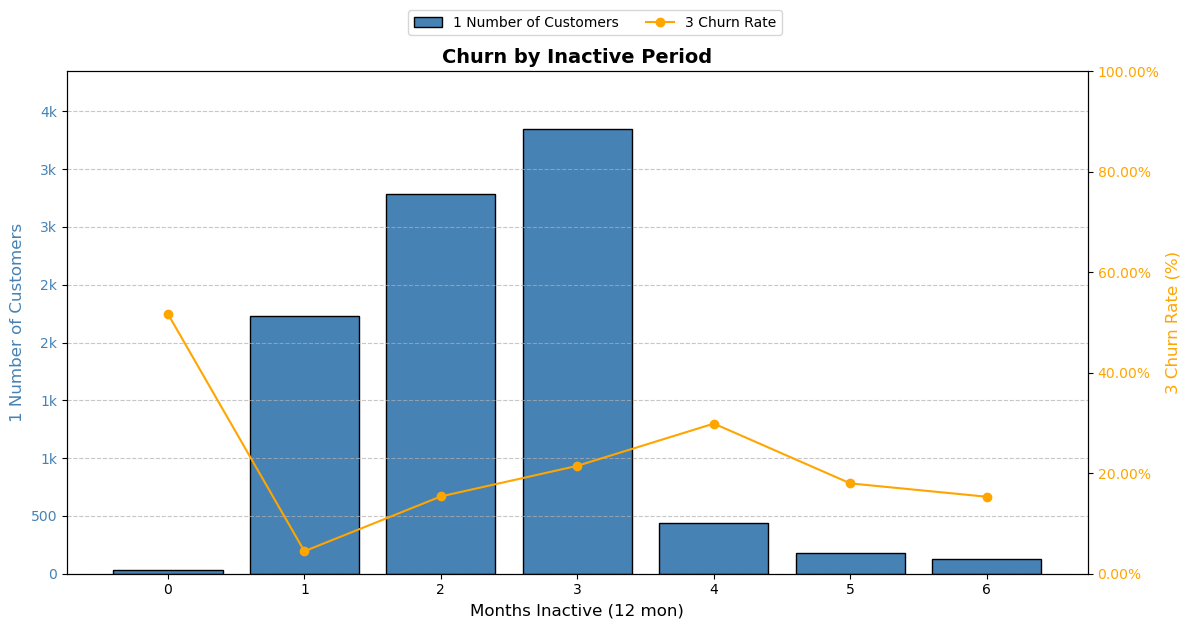

In [16]:

# Group data by 'Months_Inactive_12_mon' and calculate churn rate and number of customers
inactive_stats = data.groupby('Months_Inactive_12_mon').agg(
    Churn_Rate=('Attrition_Flag', lambda x: (x == 'Attrited Customer').mean() * 100),
    Number_of_Customers=('Customer_Age', 'count')  # Count any non-null column for customer count
).reset_index()

# Plot settings
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of customers
bars = ax1.bar(
    inactive_stats['Months_Inactive_12_mon'],
    inactive_stats['Number_of_Customers'],
    color='steelblue',
    edgecolor='black',
    label='1 Number of Customers'
)
ax1.set_xlabel('Months Inactive (12 mon)', fontsize=12)
ax1.set_ylabel('1 Number of Customers', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_ylim(0, inactive_stats['Number_of_Customers'].max() + 500)
ax1.set_xticks(inactive_stats['Months_Inactive_12_mon'])

# Format y-axis ticks for number of customers (e.g., 1000 -> 1k)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x / 1000)}k" if x >= 1000 else int(x)))

# Line plot for churn rate
ax2 = ax1.twinx()
ax2.plot(
    inactive_stats['Months_Inactive_12_mon'],
    inactive_stats['Churn_Rate'],
    color='orange',
    marker='o',
    label='3 Churn Rate'
)
ax2.set_ylabel('3 Churn Rate (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 100)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.2f}%"))

# Title and grid
plt.title('Churn by Inactive Period', fontsize=14, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Legend for both axes
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)

# Tight layout and show plot
plt.tight_layout()
plt.show()


The churn by inactive period data shows a clear relationship between customer inactivity and churn rate. Customers with no inactivity in the past 12 months have an exceptionally high churn rate of approximately 51.72%, which is counterintuitive and requires further investigation to understand why these active customers are leaving. The churn rate drops dramatically to about 4.48% for customers with one month of inactivity. However, as the inactivity period increases to three months, the churn rate climbs to 21.47%, peaking for customers who have been inactive for four months at approximately 29.89%. After this peak, the churn rate decreases again for those with five and six months of inactivity, with rates around 17.98% and 15.32%, respectively.

III. II. Churn by Revolving Balance.

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\2641980025.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = data.groupby('Revolving_Bal_Binned').agg(


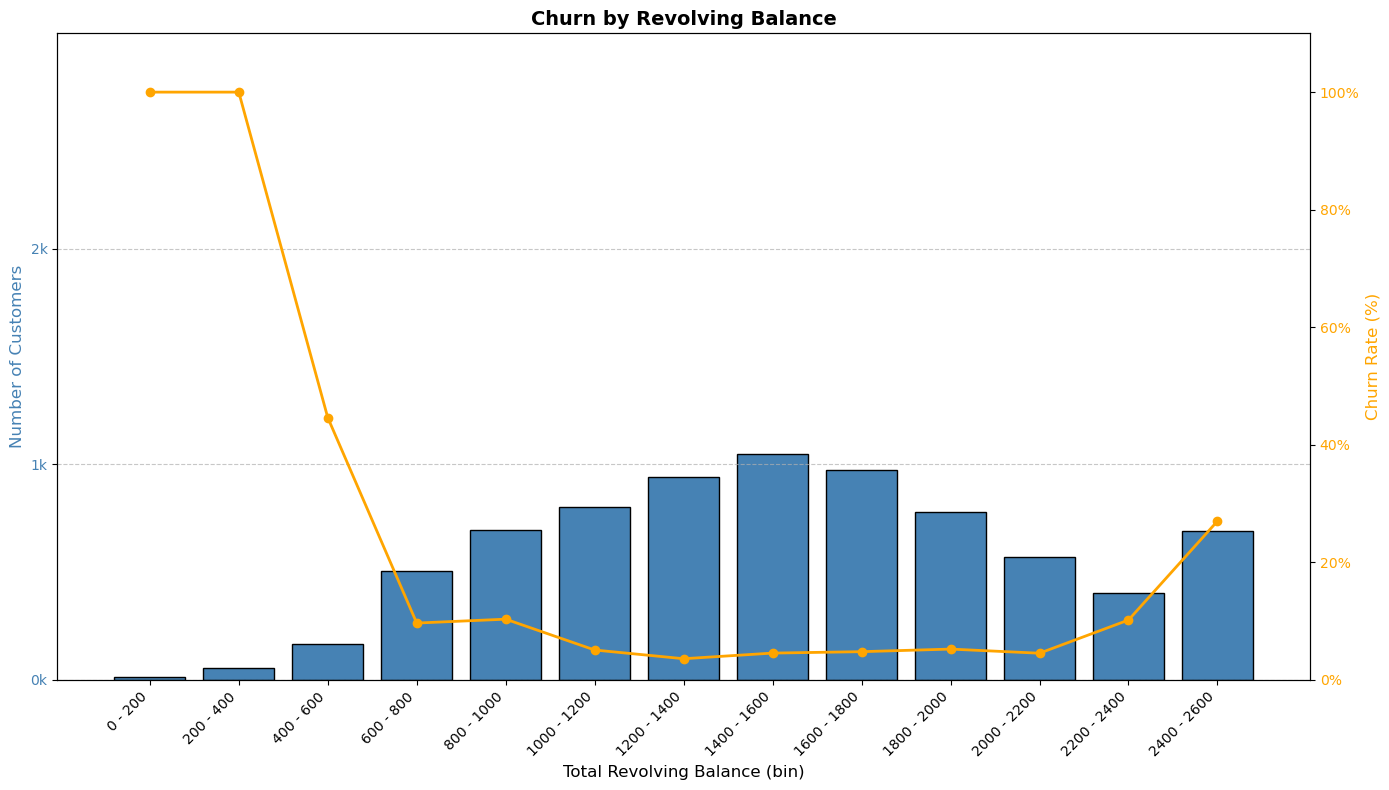

In [17]:


# Define bins for 'Total_Revolving_Bal' column
bins = np.arange(0, 2601, 200)  # Bins from 0 to 2600 with steps of 200
data['Revolving_Bal_Binned'] = pd.cut(data['Total_Revolving_Bal'], bins)

# Calculate churn rate and number of customers for each bin
binned_stats = data.groupby('Revolving_Bal_Binned').agg(
    Churn_Rate=('Attrition_Flag', lambda x: (x == 'Attrited Customer').mean() * 100),
    Number_of_Customers=('Total_Revolving_Bal', 'count')
).reset_index()

# Extract bin labels for the x-axis
bin_labels = [
    f"{int(interval.left)} - {int(interval.right)}" 
    for interval in binned_stats['Revolving_Bal_Binned']
]

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))  # Increased figure size

# Bar plot for the number of customers
bars = ax1.bar(
    range(len(bin_labels)), 
    binned_stats['Number_of_Customers'], 
    color='steelblue', 
    edgecolor='black', 
    label='Number of Customers'
)
ax1.set_xlabel('Total Revolving Balance (bin)', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_ylim(0, 3000)  # Set the limit to 3k

# Format y-axis for number of customers (e.g., 1k, 2k, 3k)
ax1.set_yticks(np.arange(0, 2001, 1000))
ax1.set_yticklabels([f"{int(y/1000)}k" for y in ax1.get_yticks()])

# Add bin edges as labels
ax1.set_xticks(range(len(bin_labels)))
ax1.set_xticklabels(bin_labels, rotation=45, ha='right', fontsize=10)

# Line plot for churn rate
ax2 = ax1.twinx()
ax2.plot(
    range(len(bin_labels)), 
    binned_stats['Churn_Rate'], 
    color='orange', 
    marker='o', 
    linewidth=2, 
    label='Churn Rate (%)'
)
ax2.set_ylabel('Churn Rate (%)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 110)  # Increased to prevent overlap at 100%

# Format y-axis for churn rate to include percentage
ax2.set_yticks(np.arange(0, 111, 20))
ax2.set_yticklabels([f"{int(y)}%" for y in ax2.get_yticks()])

# Add a title
plt.title('Churn by Revolving Balance', fontsize=14, fontweight='bold')

# Show the grid
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


The churn by revolving balance data presents a compelling view of how revolving balance ranges correlate with churn rates. Customers with the lowest revolving balances (0–128) exhibit a high churn rate of approximately 36.15%. Surprisingly, those with very high revolving balances also tend to churn at significant rates, specifically in the 256–384 range and the 384–512 range, with churn rates at 100% and approximately 64.86%, respectively. This suggests that customers who are either not utilizing their revolving credit or are heavily utilizing it are more prone to churn.

Conversely, customers with revolving balances in the middle ranges have lower churn rates, indicating that customers who maintain a moderate revolving balance are more likely to stay with the bank. For instance, balances in the range of 1152–1280 show a notably low churn rate of around 3.48%.

III. III. Churn by Count of Transaction.

C:\Users\atilg\AppData\Local\Temp\ipykernel_17276\800549228.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trans_bin_summary = data.groupby('Trans_Bin').agg(


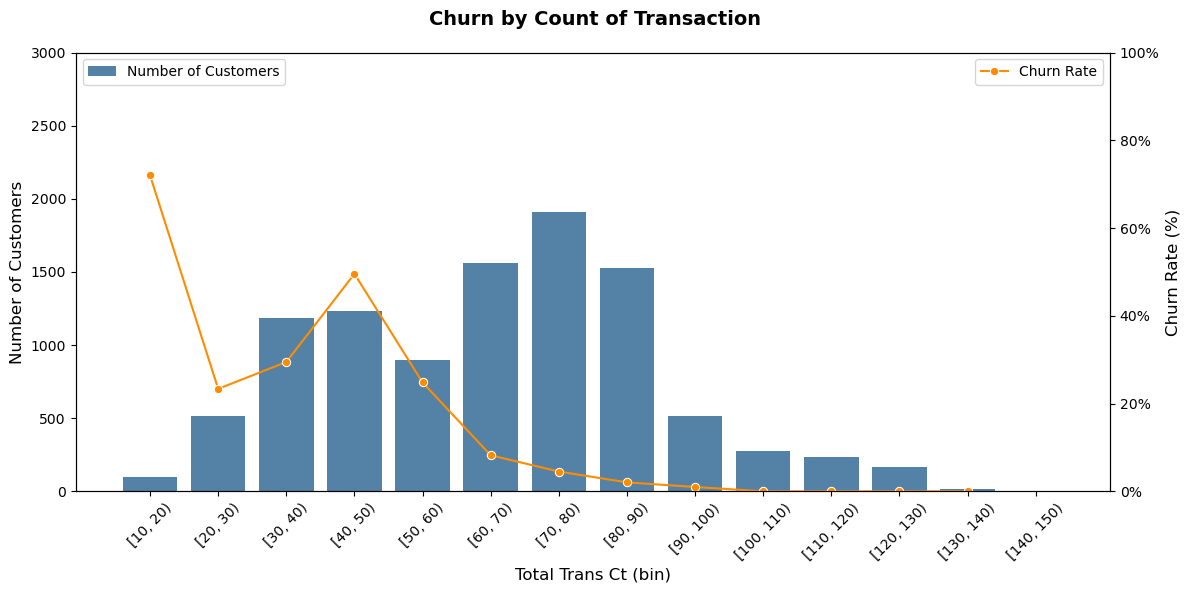

In [18]:
# 'Attrition_Flag' sütununa göre churn durumunu belirleme
data['Churn'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# 'Total_Trans_Ct' sütununu 10'ar aralıklarla bölme
bins = range(10, 160, 10)
data['Trans_Bin'] = pd.cut(data['Total_Trans_Ct'], bins=bins, right=False)

# Bin bazında müşteri sayısı ve churn oranını hesaplama
trans_bin_summary = data.groupby('Trans_Bin').agg(
    Number_of_Customers=('Customer_Age', 'count'),
    Churn_Rate=('Churn', 'mean')
).reset_index()

# Churn oranını yüzde formatına çevirme
trans_bin_summary['Churn_Rate'] *= 100

# Bar ve çizgi grafiği çizme
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar grafiği (Number of Customers)
sns.barplot(
    x=trans_bin_summary['Trans_Bin'].astype(str),
    y=trans_bin_summary['Number_of_Customers'],
    color='steelblue',
    ax=ax1,
    label='Number of Customers'
)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.set_xlabel('Total Trans Ct (bin)', fontsize=12)
ax1.set_ylim(0, 3000)
ax1.tick_params(axis='y', labelsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)

# İkinci y ekseni (Churn Rate)
ax2 = ax1.twinx()
sns.lineplot(
    x=trans_bin_summary['Trans_Bin'].astype(str),
    y=trans_bin_summary['Churn_Rate'],
    color='darkorange',
    marker='o',
    ax=ax2,
    label='Churn Rate'
)
ax2.set_ylabel('Churn Rate (%)', fontsize=12)
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelsize=10)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Başlık ve gösterge
fig.suptitle('Churn by Count of Transaction', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

The churn by the total count of transactions data illustrates a trend where transaction activity levels are inversely related to churn rates. The data shows exceptionally high churn rates in ranges with very low transaction counts. Specifically, the 14.4–21.6 range has an 83.33% churn rate, and the 21.6–28.8 range has a churn rate of 56.25%. Conversely, as transaction activity increases, the churn rate generally decreases, evidenced by lower churn rates in the higher transaction ranges such as 64.8–72.0 with a churn rate of around 11.48%, and 72.0–79.2 with an even lower rate of approximately 5.99%.

Conclusion.

Based on the churn analyses conducted, we can conclude that customer churn at the bank is influenced by a variety of factors, including the customer’s status, number of products used, the length of time a customer has been with the bank, credit limit, card category, inactive periods, and transaction counts.

The bank must prioritize making each one feel valued and appreciated to retain its customers. This can be achieved by implementing reward programs, offering financial management advice, and regularly staying in touch with them. The ultimate goal is to ensure customer satisfaction and loyalty towards the bank. The bank can proactively retain more customers by closely monitoring customer activities and addressing any concerns or issues.

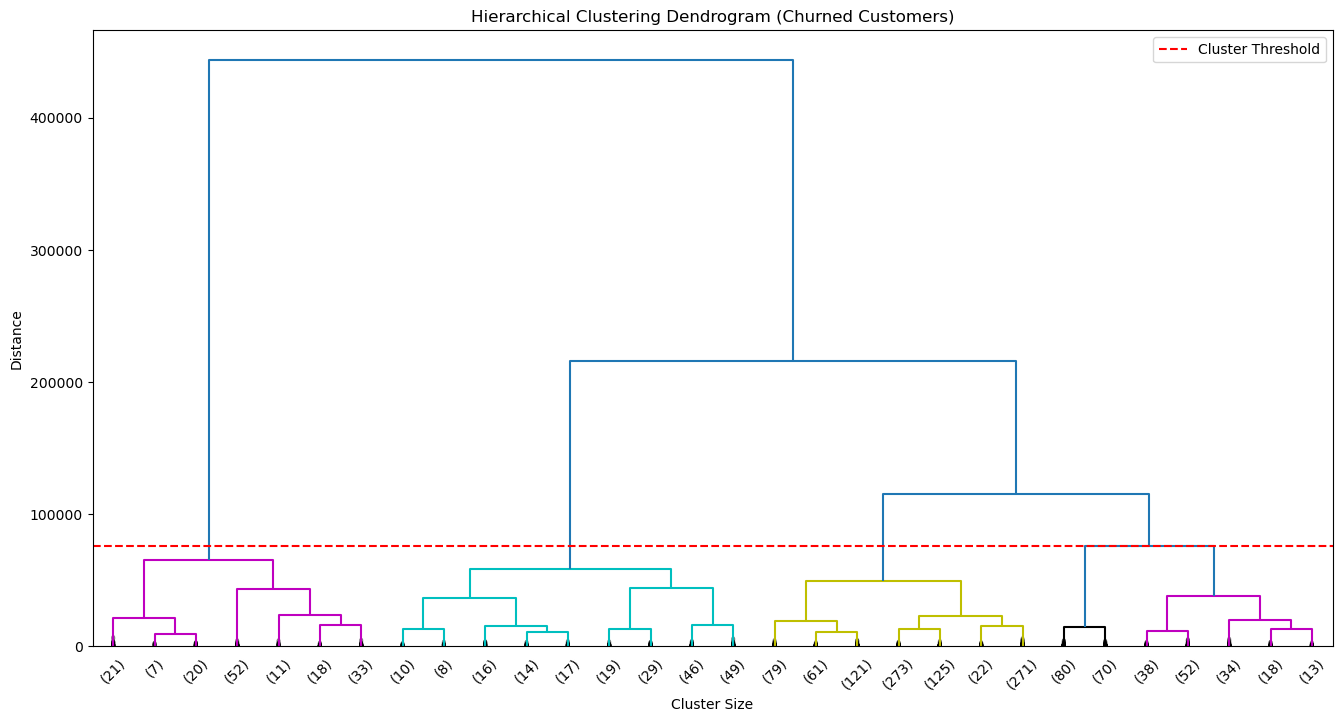

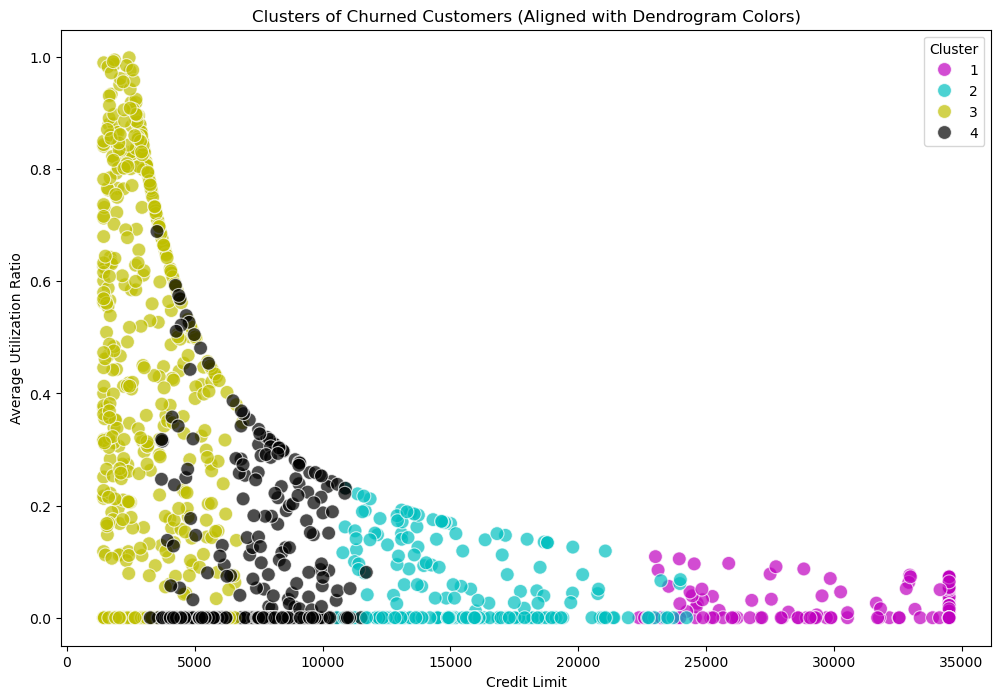

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster.hierarchy import set_link_color_palette



# Churn eden müşterileri filtreleme
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']

# Kullanılacak özellikler
clustering_features = [
    'Customer_Age', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Amt'
]
clustering_features_churned = churned_customers[clustering_features]

# Tüm veriyi kullanma
sampled_churned_data = clustering_features_churned

# Linkage matrisi hesaplama
linkage_matrix_churned = linkage(sampled_churned_data, method='ward')

# Dendrogram için renk paletini ayarlama
set_link_color_palette(['m', 'c', 'y', 'k'])

# Dendrogram çizimi
plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix_churned,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=45,
    leaf_font_size=10,
    show_contracted=True,
    color_threshold=linkage_matrix_churned[-4, 2]  # 4 küme için renk eşik değeri
)
plt.axhline(y=linkage_matrix_churned[-4, 2], color='r', linestyle='--', label="Cluster Threshold")
plt.title("Hierarchical Clustering Dendrogram (Churned Customers)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.legend()
plt.show()

# Kümeleri belirleme
cluster_labels = fcluster(linkage_matrix_churned, t=4, criterion='maxclust')
sampled_churned_data_with_labels = sampled_churned_data.copy()
sampled_churned_data_with_labels['Cluster'] = cluster_labels

# Scatter plot için renk paletini tanımlama
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=sampled_churned_data_with_labels,
    x="Credit_Limit",
    y="Avg_Utilization_Ratio",
    hue="Cluster",
    palette=['m', 'c', 'y', 'k'],  # Dendrogram renk paletine uygun renkler
    s=100,
    alpha=0.7
)
plt.title("Clusters of Churned Customers (Aligned with Dendrogram Colors)")
plt.xlabel("Credit Limit")
plt.ylabel("Average Utilization Ratio")
plt.legend(title="Cluster")
plt.show()


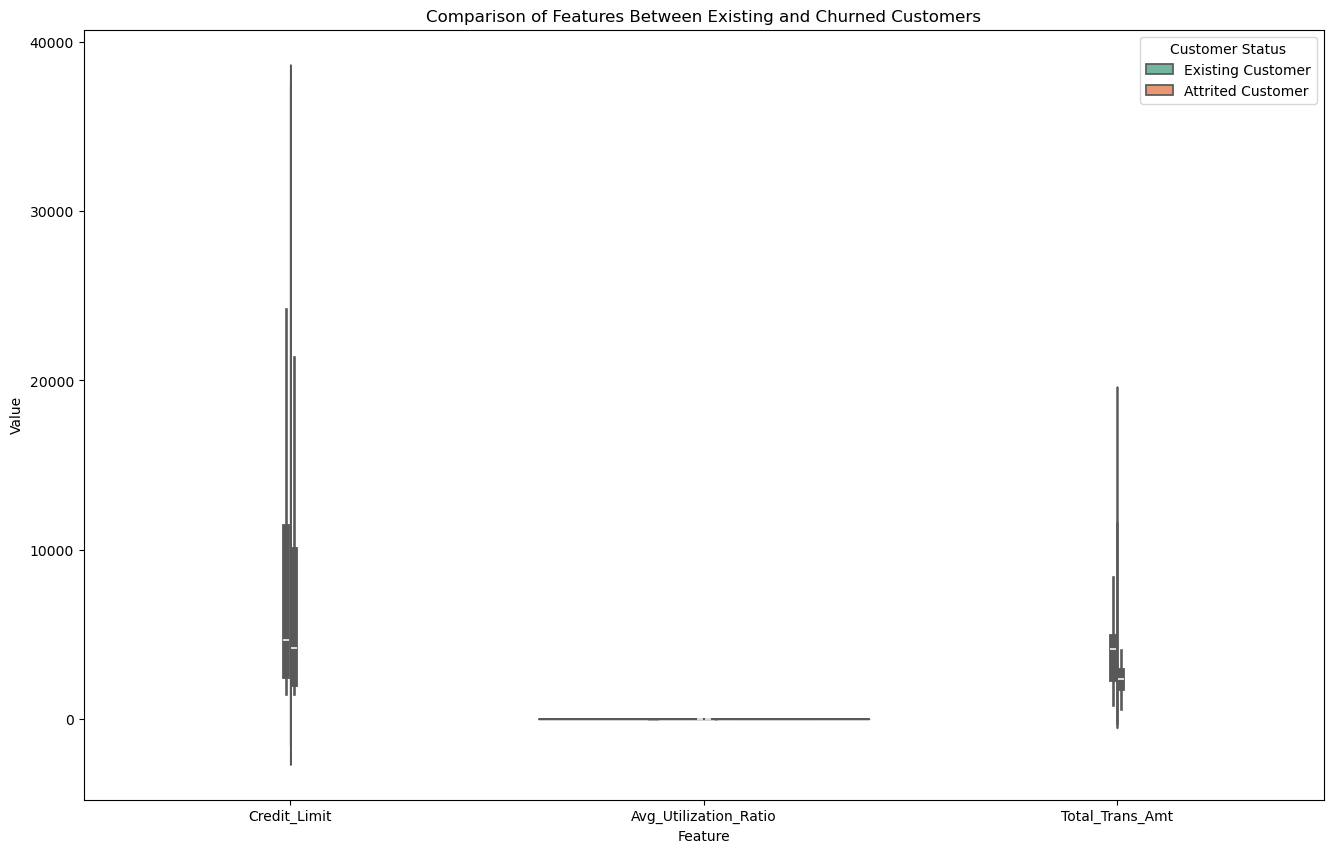

In [20]:


# Mevcut ve ayrılan müşterileri ayırma
current_customers = data[data['Attrition_Flag'] == 'Existing Customer']
churned_customers = data[data['Attrition_Flag'] == 'Attrited Customer']

# Karşılaştırma için seçilen özellikler
comparison_features = ['Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Amt']

# Karşılaştırma için veriyi yeniden düzenleme
comparison_data = pd.melt(
    data,
    id_vars=['Attrition_Flag'],
    value_vars=comparison_features,
    var_name='Feature',
    value_name='Value'
)

# Violin plot görselleştirmesi
plt.figure(figsize=(16, 10))
sns.violinplot(
    data=comparison_data,
    x='Feature',
    y='Value',
    hue='Attrition_Flag',
    split=True,
    palette='Set2'
)
plt.title('Comparison of Features Between Existing and Churned Customers')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend(title='Customer Status', loc='upper right')
plt.show()


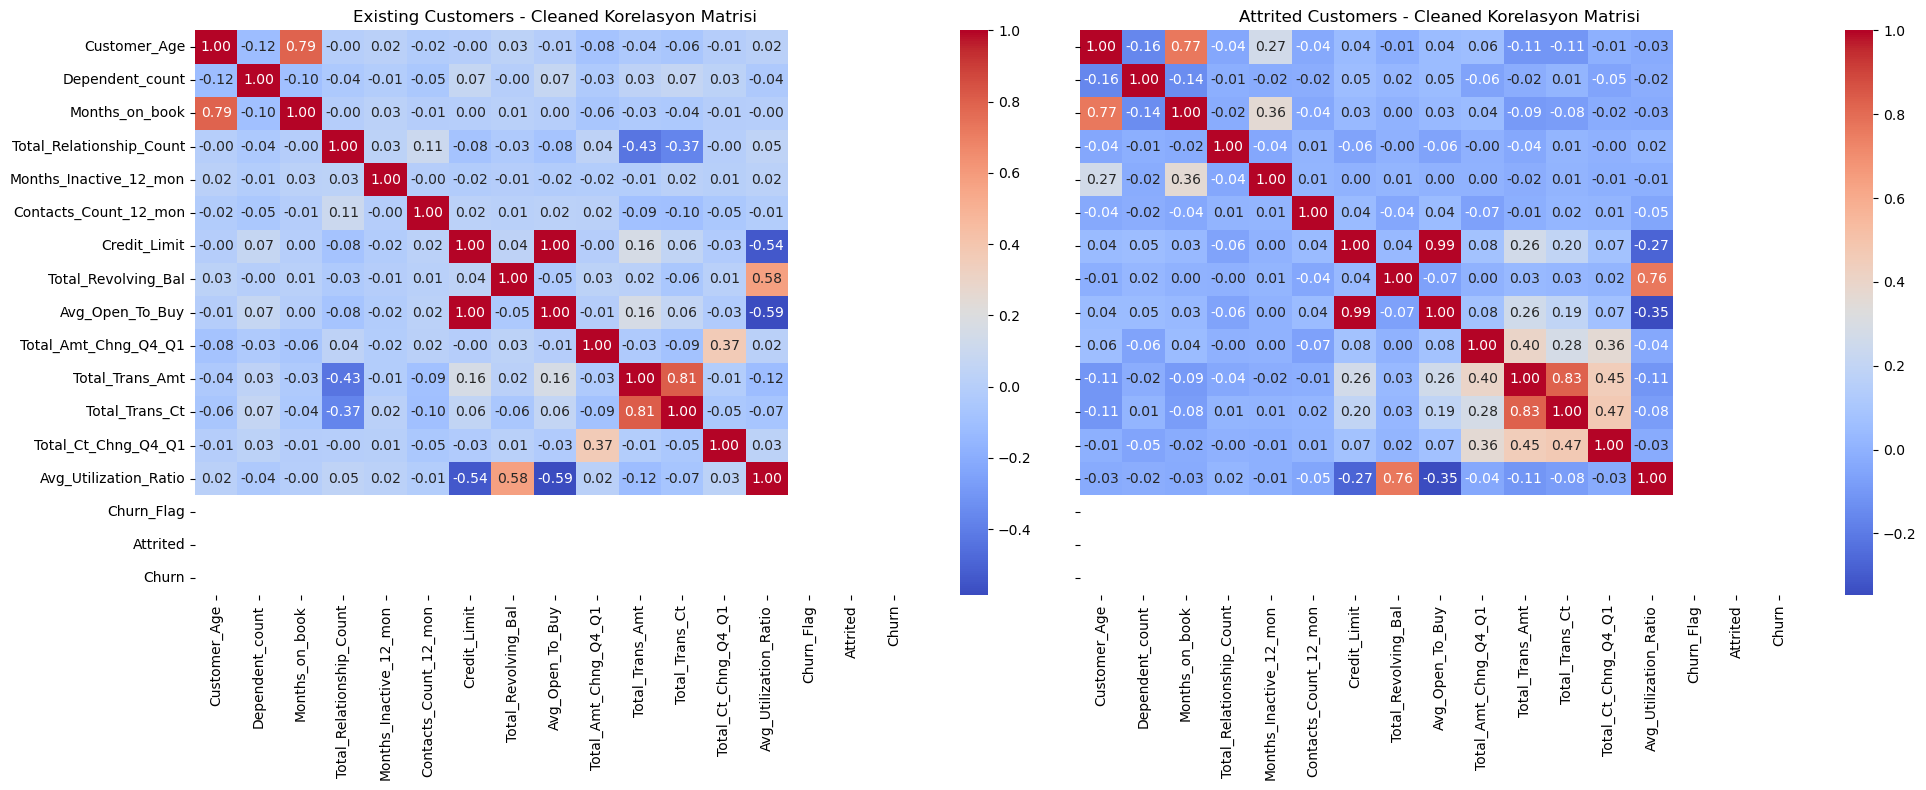

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri temizleme
columns_to_drop = [
    "CLIENTNUM",
    "Card_Category",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
cleaned_data = data.drop(columns=columns_to_drop)

# Veriyi gruplama
existing_customers = data[data["Attrition_Flag"] == "Existing Customer"]
attrited_customers = data[data["Attrition_Flag"] == "Attrited Customer"]

# Temizlenmiş veri setindeki sayısal değişkenler için korelasyon hesaplama
existing_corr_cleaned = existing_customers[cleaned_data.columns].corr(numeric_only=True)
attrited_corr_cleaned = attrited_customers[cleaned_data.columns].corr(numeric_only=True)

# İki grup için heatmap çizimi
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Mevcut müşteriler için heatmap
sns.heatmap(existing_corr_cleaned, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=axes[0])
axes[0].set_title("Existing Customers - Cleaned Korelasyon Matrisi")

# Ayrılan müşteriler için heatmap
sns.heatmap(attrited_corr_cleaned, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=axes[1])
axes[1].set_title("Attrited Customers - Cleaned Korelasyon Matrisi")

plt.tight_layout()
plt.show()


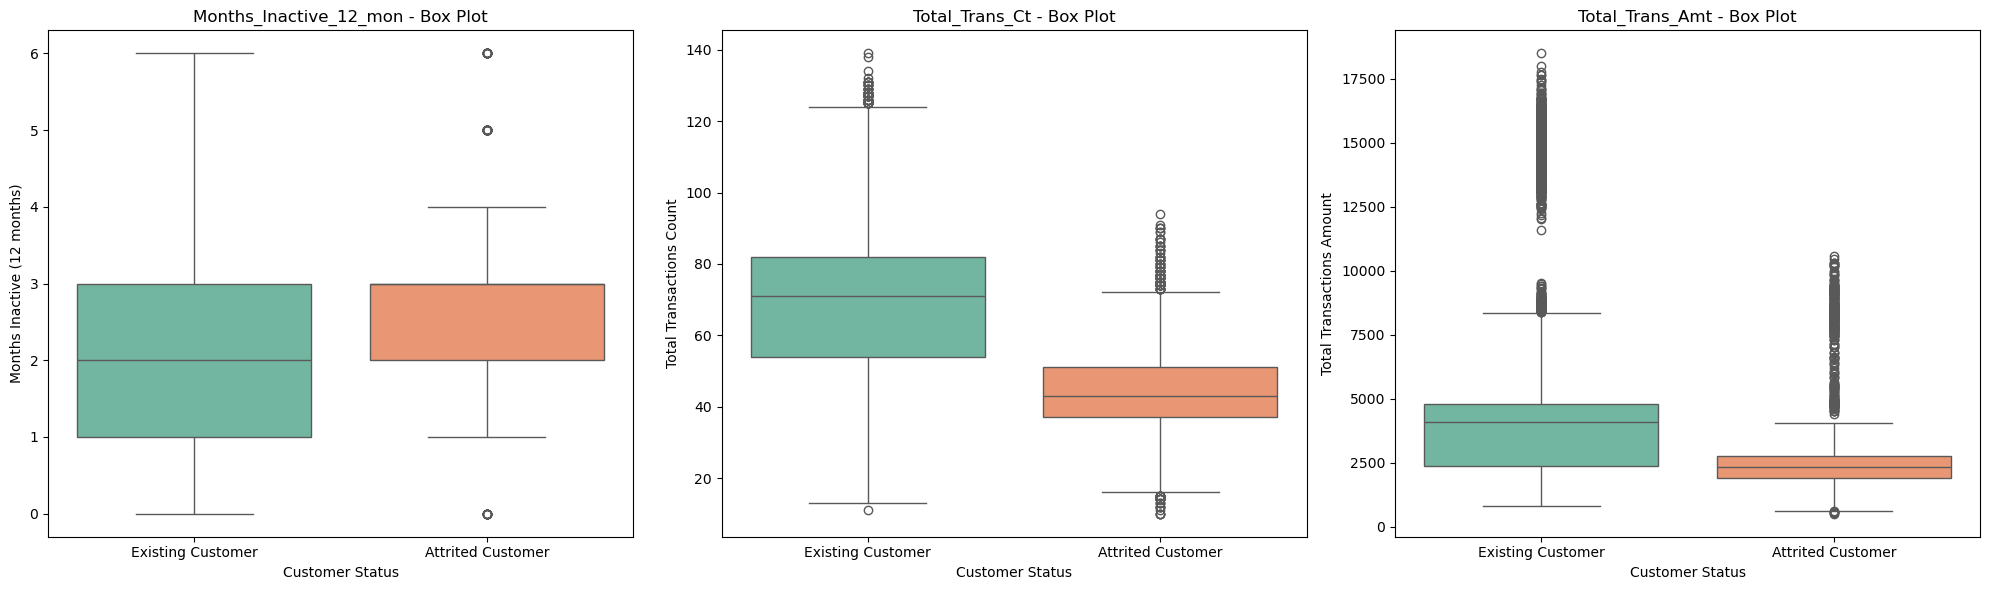

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot: "Months_Inactive_12_mon" ve "Total_Trans_Ct/Amt" için iki grup arasında karşılaştırma
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Box plot: Months_Inactive_12_mon
sns.boxplot(data=data, x="Attrition_Flag", y="Months_Inactive_12_mon", hue="Attrition_Flag", palette="Set2", ax=axes[0], dodge=False, legend=False)
axes[0].set_title("Months_Inactive_12_mon - Box Plot")
axes[0].set_ylabel("Months Inactive (12 months)")
axes[0].set_xlabel("Customer Status")

# Box plot: Total_Trans_Ct
sns.boxplot(data=data, x="Attrition_Flag", y="Total_Trans_Ct", hue="Attrition_Flag", palette="Set2", ax=axes[1], dodge=False, legend=False)
axes[1].set_title("Total_Trans_Ct - Box Plot")
axes[1].set_ylabel("Total Transactions Count")
axes[1].set_xlabel("Customer Status")

# Box plot: Total_Trans_Amt
sns.boxplot(data=data, x="Attrition_Flag", y="Total_Trans_Amt", hue="Attrition_Flag", palette="Set2", ax=axes[2], dodge=False, legend=False)
axes[2].set_title("Total_Trans_Amt - Box Plot")
axes[2].set_ylabel("Total Transactions Amount")
axes[2].set_xlabel("Customer Status")

plt.tight_layout()
plt.show()


In [23]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from jupyter_dash import JupyterDash

# Veri yükleme
data = pd.read_csv('updated_dataset.csv')
data['Churn_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Dash uygulamasını başlatma
app = JupyterDash(__name__)

# Layout tasarımı
app.layout = html.Div([
    html.H1('Churn Analysis Dashboard', style={'textAlign': 'center', 'color': '#2c3e50', 'font-family': 'Arial'}),

    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'Age Groups', 'value': 'age'},
            {'label': 'Income Category', 'value': 'income'},
            {'label': 'Education Level', 'value': 'education'},
            {'label': 'Card Category', 'value': 'card'},
            {'label': 'Months on Book', 'value': 'months'},
            {'label': 'Months Inactive', 'value': 'inactive'}
        ],
        value='age',
        style={'width': '60%', 'margin': '20px auto', 'font-family': 'Arial'}
    ),

    dcc.Graph(id='churn-graph'),

    html.Div(id='analysis-text', style={
        'margin': '20px auto', 'padding': '20px', 'width': '80%',
        'border': '1px solid #ddd', 'border-radius': '10px', 'background-color': '#ecf0f1',
        'font-family': 'Arial', 'font-size': '16px', 'line-height': '1.6'
    })
], style={'background-color': '#f5f5f5', 'padding': '20px'})

# Callback fonksiyonu
@app.callback(
    [Output('churn-graph', 'figure'),
     Output('analysis-text', 'children')],
    [Input('feature-dropdown', 'value')]
)
def update_graph(selected_feature):
    try:
        if selected_feature == 'age':
            bins = list(range(20, 81, 10))
            labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
            data['Age_Bin'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, right=False)
            grouped_data = data.groupby('Age_Bin').agg(
                Customer_Count=('CLIENTNUM', 'count'),
                Churn_Rate=('Churn_Flag', 'mean')
            ).reset_index()
            x_data, x_label = grouped_data['Age_Bin'], 'Age Groups'
            analysis_text = "Middle-aged groups (40–60) show the highest churn rates."

        elif selected_feature == 'income':
            grouped_data = data.groupby('Income_Category').agg(
                Customer_Count=('CLIENTNUM', 'count'),
                Churn_Rate=('Churn_Flag', 'mean')
            ).reset_index()
            x_data, x_label = grouped_data['Income_Category'], 'Income Category'
            analysis_text = "Lower income (<40K) and higher income (>120K) groups churn more."

        elif selected_feature == 'education':
            grouped_data = data.groupby('Education_Level').agg(
                Customer_Count=('CLIENTNUM', 'count'),
                Churn_Rate=('Churn_Flag', 'mean')
            ).reset_index()
            x_data, x_label = grouped_data['Education_Level'], 'Education Level'
            analysis_text = "Education level affects churn, especially for less-educated groups."

        elif selected_feature == 'card':
            grouped_data = data.groupby('Card_Category').agg(
                Customer_Count=('CLIENTNUM', 'count'),
                Churn_Rate=('Churn_Flag', 'mean')
            ).reset_index()
            x_data, x_label = grouped_data['Card_Category'], 'Card Category'
            analysis_text = "Premium card users tend to churn less than standard card users."

        elif selected_feature == 'months':
            grouped_data = data.groupby('Months_on_book').agg(
                Customer_Count=('CLIENTNUM', 'count'),
                Churn_Rate=('Churn_Flag', 'mean')
            ).reset_index()
            x_data, x_label = grouped_data['Months_on_book'], 'Months on Book'
            analysis_text = "Customers with fewer months on book churn more."


        elif selected_feature == 'inactive':
            grouped_data = data.groupby('Months_Inactive_12_mon').agg(
                Customer_Count=('CLIENTNUM', 'count'),
                Churn_Rate=('Churn_Flag', 'mean')
            ).reset_index()
            x_data, x_label = grouped_data['Months_Inactive_12_mon'], 'Months Inactive'
            analysis_text = "Inactivity is a significant predictor of churn."

        # Grafik oluşturma
        fig = make_subplots(specs=[[{"secondary_y": True}]])

        fig.add_trace(
            go.Bar(
                x=x_data, y=grouped_data['Customer_Count'], name="Number of Customers",
                marker_color='rgb(100,149,237)'
            ),
            secondary_y=False
        )

        fig.add_trace(
            go.Scatter(
                x=x_data, y=grouped_data['Churn_Rate'] * 100, name="Churn Rate (%)",
                mode='lines+markers', marker_color='rgb(255,69,0)'
            ),
            secondary_y=True
        )

        fig.update_layout(
            title_text=f"Churn Analysis by {x_label}",
            xaxis_title=x_label,
            yaxis_title="Customer Count",
            template='plotly_white'
        )

        fig.update_yaxes(title_text="Number of Customers", secondary_y=False)
        fig.update_yaxes(title_text="Churn Rate (%)", secondary_y=True)

        return fig, analysis_text

    except Exception as e:
        return go.Figure(), f"An error occurred while processing the feature: {str(e)}"

# Uygulamayı çalıştır
if __name__ == '__main__':
    app.run_server(mode='inline')


c:\Users\atilg\anaconda3\Lib\site-packages\dash\dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

